In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cols=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
df=pd.read_csv('Cleavland.csv')
df.columns=cols
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
df=df.replace("?",pd.NA)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [5]:
df=df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [7]:
df=df.astype(float)
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

# Histograms
# objective: Visualize the distribution of the 'age' and 'chol' variables in the Heart disease dataset.

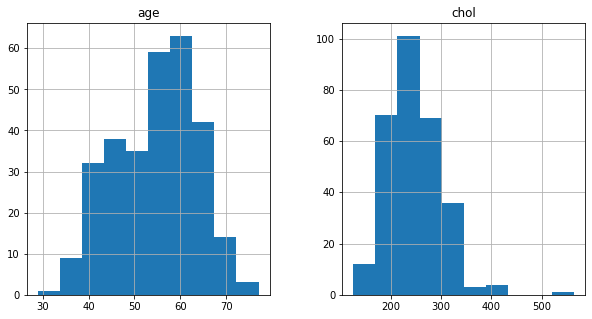

In [9]:
df[['age','chol']].hist(figsize=(10,5))
plt.show()

# Dot Plots
# Compare the values of 'thalach' (maximum heart rate achieved) for different genders (0 for female, 1 for male) in the Heart disease dataset.

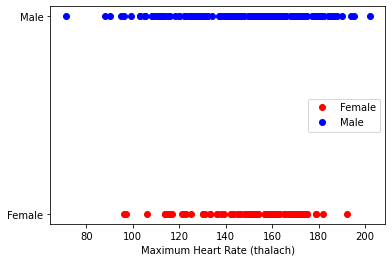

In [12]:
data =df.copy()
plt.plot(data[data['sex'] == 0]['thalach'], [1] * len(data[data['sex'] == 0]), 'ro', label='Female')
plt.plot(data[data['sex'] == 1]['thalach'], [2] * len(data[data['sex'] == 1]), 'bo', label='Male')
plt.yticks([1, 2], ['Female', 'Male'])
plt.xlabel('Maximum Heart Rate (thalach)')
plt.legend()
plt.show()

# Bar Plot
# Objective: Compare the frequency of each chest pain type ('cp') in the Heart disease dataset.

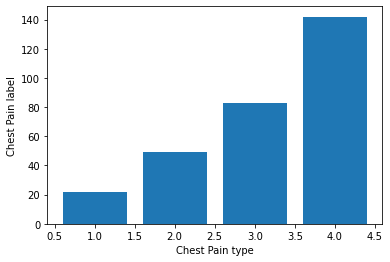

In [18]:
cp_counts=df["cp"].value_counts()
plt.bar(cp_counts.index,cp_counts.values)
plt.xlabel("Chest Pain type")
plt.ylabel("Chest Pain label")
plt.show()


# Line Charts:
# Objective: Observe the trend of 'thalach' (maximum heart rate achieved) over different ages in the Heart disease dataset.

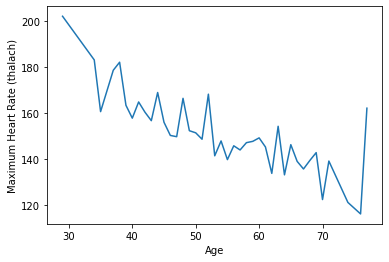

In [19]:
age_thalach = df.groupby('age')['thalach'].mean()
plt.plot(age_thalach.index, age_thalach.values)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

# e. Multivariate analysis using scatter plot:
# Objective: Analyze the relationship between 'chol' (serum cholesterol) and 'trestbps' (resting blood pressure) in the Heart disease dataset.

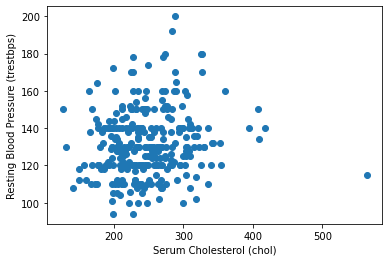

In [20]:
plt.scatter(df['chol'], df['trestbps'])
plt.xlabel('Serum Cholesterol (chol)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

# PS18

# Pie Charts:
# Objective: Visualize the proportion of different chest pain types ('cp') in the Heart disease dataset.

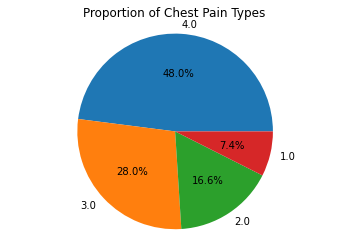

In [24]:
cp_counts = df['cp'].value_counts()
plt.pie(cp_counts, labels=cp_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Chest Pain Types')
plt.show()

# c. Box Plots:
# Objective: Compare the distribution of 'chol' (serum cholesterol) for each 'cp' (chest pain type) in the Heart disease dataset.

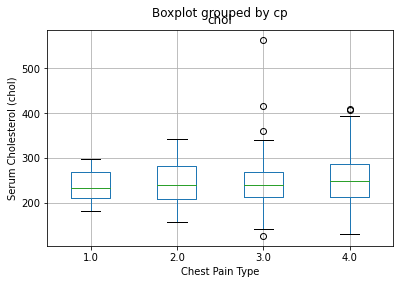

In [25]:
df.boxplot(column='chol', by='cp')
plt.xlabel('Chest Pain Type')
plt.ylabel('Serum Cholesterol (chol)')
plt.show()